# Objective
We're interested in a mirror that is reflective in the mid-IR (reflective
band centered 1550 - 2200 cm-1 depending on exact system, with reflectivity
band width of ~200 cm-1 or more) and as transmissive as possible in the
upper visible (roughly from 350-700 nm)

Potential materials include: Ag, Si3N4, SiO2, TiO2, Al2O3, Ta2O5, ZrO2



# Can a DBR work?
If we center the reflection band in the mid-IR, can we get lucky enough to have high transmissivity in 
the visible band?  We can start with a guess structure based on this concept and
try to optimize the thicknesses from there.  

We will base the guess thicknesses on using SiO2 ($n \approx 1.5$) and Al2O3 ($n \approx 1.85$) using
$$ nd=\frac{\lambda}{4} \rightarrow d = \frac{\lambda}{4n}$$

with $\lambda = 5 \mu m$.

In [1]:
import wptherml
from matplotlib import pyplot as plt
import numpy as np
import time

In [2]:
# guess thickness for glass
d1 = 5000e-9 / (4 * 1.5)
# guess thickness for Al2O3
d2 = 5000e-9 / (4 * 1.85)

print(F"Trial thickness of glass layer is {d1:.3e} m")
print(F"Trial thickness of alumina layer is {d2:.3e} m")

Trial thickness of glass layer is 8.333e-07 m
Trial thickness of alumina layer is 6.757e-07 m


We will set up a structure with 13 periods of alternating SiO2 and Al2O3 (26 layers total).

The spectra will be computed in the wavelength range $300 \: nm - 6000 \: nm$.

We will set the desired window of high reflectivity to be between $2000 \: cm^{-1} - 2400 \: cm^{-1}$
(equivalently, $4166 \: nm - 5000 \: nm$.)

We will compute two different figures of merit that we will call the transmission efficiency ($\eta_T$)
and the reflection efficiency ($\eta_R$).

We will define the transmission efficiency as 

$$ \eta_T = \frac{\int_{\lambda_1}^{\lambda_2} \Pi_T(\lambda) T(\lambda) d\lambda }{\int_{\lambda_1}^{\lambda_2} \Pi_T(\lambda) d\lambda} $$
where $T(\lambda)$ is the transmission spectrum of the stack and $\Pi_T(\lambda)$ is the desired 
transmission envelope (defined to be 1 in the range specified by the `transmissive_window_nm` keyword and 0 elsewhere; note the user specifies this in units of nanometers.  The default is 350 - 700 nm).

The reflection efficiency can be defined as
$$ \eta_R = \frac{\int_{\lambda_1}^{\lambda_2} \Pi_R(\lambda) R(\lambda) d\lambda }{\int_{\lambda_1}^{\lambda_2} R(\lambda) d\lambda} $$
where $R(\lambda)$ is the reflection spectrum of the stack and $\Pi_R(\lambda)$ is the desired 
reflection envelope (defined to be 1 in the range specified by the `reflective_window_wn` keyword and 0 elsewhere,
note the user speciies this in units of inverse centimeters.  The default is 2000 - 2400 $cm^{-1}$).

The wavelength range of the spectra and integral are set by the `wavelength_list` keywords.

The structure composition is set by the `Material_List` keyword; you can subsitute any of the
central layers by changing the chemical formula.  The materials you listed (Ag, Si3N4, SiO2, TiO2, Al2O3, Ta2O5, ZrO2) are all supported and can be specified by those strings in the Material_List.  The terminal layers (first and last) should remain "Air" and their thickness should be fixed at 0 for all calculation.

The structure geometry is set by the `Thickness_List` keyword.

The block below will create an instance of a DBR that we will call `test`.  

We will call the method `test.compute_selective_mirror_fom()` to compute $\eta_T$ and $\eta_R$, as well as a 
composite figure of merit called `test.selective_mirror_fom` defined as $f = \frac{1}{2} \left( \eta_T + \eta_R \right)$

In [3]:
test_args = {
    "wavelength_list": [300e-9, 6000e-9, 1000],
    "Material_List": ["Air","SiO2", "Al2O3", "SiO2", "ZrO2","SiO2", "Al2O3", "SiO2", "Al2O3","SiO2", "Al2O3", "SiO2", "Al2O3","SiO2", "Al2O3","SiO2", "Al2O3", "SiO2", "Al2O3","SiO2", "Al2O3", "SiO2", "Al2O3" ,"SiO2", "Al2O3", "SiO2", "Al2O3" , "Air"],
    "Thickness_List": [0,d1, d2, d1, d2,d1, d2, d1, d2, d1, d2, d1, d2, d1, d2,d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, 0],
    "reflective_window_wn" : [2000, 2400],
    "transmissive_window_nm" : [350, 700],
 }

sf = wptherml.SpectrumFactory()


# create an instance of the DBR called test
test = sf.spectrum_factory('Tmm', test_args)



# compute the foms
test.compute_selective_mirror_fom()

print(F'Reflection Efficiency is {100 * test.reflection_efficiency:.2f} %')
print(F'Transmission Efficiency is {100 * test.transmission_efficiency:.2f} %')
print(F'Composite FOM is {100 * test.selective_mirror_fom:.2f} %')


 Your spectra have been computed! 😎 
Reflection Efficiency is 42.78 %
Transmission Efficiency is 75.87 %
Composite FOM is 59.33 %


We can plot the spectra on a wavenumber and wavelength axis, respectively, to visualize the behavior:

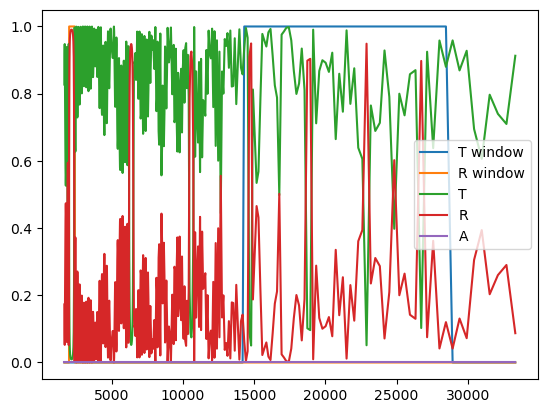

In [4]:

plt.plot(test.wavenumber_array * 1e-2, test.transmissive_envelope, label='T window')
plt.plot(test.wavenumber_array * 1e-2, test.reflective_envelope, label='R window')
plt.plot(test.wavenumber_array * 1e-2, test.transmissivity_array, label='T')
plt.plot(test.wavenumber_array * 1e-2, test.reflectivity_array, label='R')
plt.plot(test.wavenumber_array * 1e-2, test.emissivity_array, label='A')
plt.legend()

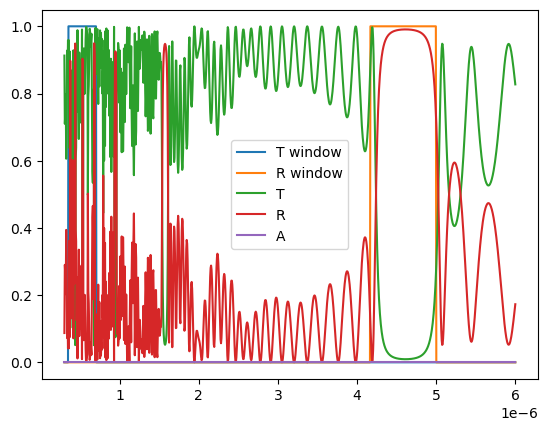

In [5]:
plt.plot(test.wavelength_array, test.transmissive_envelope, label='T window')
plt.plot(test.wavelength_array, test.reflective_envelope, label='R window')
plt.plot(test.wavelength_array, test.transmissivity_array, label='T')
plt.plot(test.wavelength_array, test.reflectivity_array, label='R')
plt.plot(test.wavelength_array, test.emissivity_array, label='A')
plt.legend()



We can now attempt to optimize the layer thicknesses to improve $\eta_T$, $\eta_R$, or some weighted average
of the two.  We are going to use the built-in BFGS optimizer in scipy that will attempt to find the minimimum 
of some objective `f(x)` given the variable(s) `x`.  

We will create two helper functions: `update_multilayer(x)` will take
an array of thicknesses (in nanometers) for the stack and recompute the figures of merit at this geometry, and
`superFunc(x)` will be a function that passes an updated `x` from the BFGS routine to the `update_multilayer(x)` 
function and return the `f(x)` value to the BFGS routine.  For now, we will not rely on gradients ($f'(x)$),
we will let the BFGS estimate then numerically, but if we add this functionality, it can be called upon and
passed back to BFGS by `superFunc`.

**Note 1** Because BFGS will want to minimize, we will actually have `superFunc` return the negative of our objectives so that BFGS will minimize the negative of our objective, which will yield a maximum of our objetive.

**Note 2** We don't want to accidentally go to ridiculous value of the thickness, so we can set bounds on the
BFGS (which is actually provided by a variant of the BFGS routine called L-BFGS-B).  We will set the lower bound 
to be 1 nm and the upper bound to be 1000 nm. You can experiment with this!



In [6]:
# library containing L-BFGS-B
from scipy.optimize import minimize

# this is a library for global optimization - can try later! from scipy.optimize import basinhopping
import time

# using the same DBR structure plotted above as a starting point - you can modify 
# this starting guess, just make sure to adjust the guess vector (xs) accordingly...
# i.e. if you end up adding or removing layers, adjust the number of elements in xs
# and if you want to start from dramatically different geometries, make sure you make
# adjustements in xs.  The compositions can be swapped out and this does not necessarily 
# require changing xs
test_args = {
    "wavelength_list": [300e-9, 6000e-9, 1000],
    "Material_List": ["Air","SiO2", "Al2O3", "SiO2", "ZrO2","SiO2", "Al2O3", "SiO2", "Al2O3","SiO2", "Al2O3", "SiO2", "Al2O3","SiO2", "Al2O3","SiO2", "Al2O3", "SiO2", "Al2O3","SiO2", "Al2O3", "SiO2", "Al2O3" ,"SiO2", "Al2O3", "SiO2", "Al2O3" , "Air"],
    "Thickness_List": [0,d1, d2, d1, d2,d1, d2, d1, d2, d1, d2, d1, d2, d1, d2,d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, 0],
    "reflective_window_wn" : [2000, 2400],
    "transmissive_window_nm" : [350, 700],
 }


# start the spectrum driver
sf = wptherml.SpectrumFactory()
# create an instance using the TMM with the structure defined as above
test = sf.spectrum_factory('Tmm', test_args)


def SuperFunc(x0):
    """ function to update the thicknesses of each layer given an
        array of thicknesses stored in x, recompute FOM, and return"""
    test.thickness_array[1:test.number_of_layers-1] = x0 * 1e-9
    test.compute_spectrum()
    test.compute_selective_mirror_fom()
    
    # We have three choices for what to define our FOM as 
    # choice 1: \eta_R
    fom = test.reflection_efficiency
    
    #choice 2: \eta_T
    #fom = test.transmission_efficiency
    
    # choice 3: average of \eta_R + \eta_T
    #fom = test.selective_mirror_fom
    
    # return negative of fom
    return -1 * fom


# the bounds for L-BFGS-B updates
# minimum layer thickness is 1 nm
bfgs_xmin = np.ones(test.number_of_layers-2)

# maximum layer thickness is 1000 nm
bfgs_xmax = 1000*np.ones(test.number_of_layers-2)

# rewrite the bounds in the way required by L-BFGS-B
bfgs_bounds = [(low, high) for low, high in zip(bfgs_xmin, bfgs_xmax)]

# define d1 and d2 in nanometers based on the trial values from first cell
d1nm = 835
d2nm = 675

# define trial x array - only specifiy the central layers that
# are being varied and specify their thickness in nanometers, not meters
xs = np.array([d1nm, d2nm, d1nm, d2nm, d1nm, d2nm, d1nm, 
               d2nm, d1nm, d2nm, d1nm, d2nm, d1nm, d2nm,
               d1nm, d2nm, d1nm, d2nm, d1nm, d2nm, d1nm, 
               d2nm, d1nm, d2nm, d1nm, d2nm])

print("xs is ")
print(xs)
fom = SuperFunc(xs)
print("initial FOM is ", fom)

### run l-bfgs-b algorithm, jac=False means L-BFGS-B will estimate gradients numerically
ret = minimize(SuperFunc, xs, method="L-BFGS-B", jac=False, bounds=bfgs_bounds)

### print optimal solution and its efficiency!
print("Optimal Structure")
print(ret.x)
print("Optimal FOM")
print(SuperFunc(ret.x))

 Your spectra have been computed! 😎 
xs is 
[835 675 835 675 835 675 835 675 835 675 835 675 835 675 835 675 835 675
 835 675 835 675 835 675 835 675]
initial FOM is  -0.42815709574282196
Optimal Structure
[1000.          805.3530311   838.53271302  557.16985311  803.50881395
  656.11451087  806.23904508  694.4394121   818.62501507  683.44038179
  819.29527221  677.75088671  817.39058992  688.79511183  792.670632
  693.75921392  815.5473967   690.44995864  810.60648217  686.14532297
  818.71304736  685.41667118  792.58735023  665.72971752  792.95953401
  725.96867157]
Optimal FOM
-0.4809492167386496


In [10]:
print(test.thickness_array)

[0.00000000e+00 1.00000000e-06 8.05353031e-07 8.38532713e-07
 5.57169853e-07 8.03508814e-07 6.56114511e-07 8.06239045e-07
 6.94439412e-07 8.18625015e-07 6.83440382e-07 8.19295272e-07
 6.77750887e-07 8.17390590e-07 6.88795112e-07 7.92670632e-07
 6.93759214e-07 8.15547397e-07 6.90449959e-07 8.10606482e-07
 6.86145323e-07 8.18713047e-07 6.85416671e-07 7.92587350e-07
 6.65729718e-07 7.92959534e-07 7.25968672e-07 0.00000000e+00]


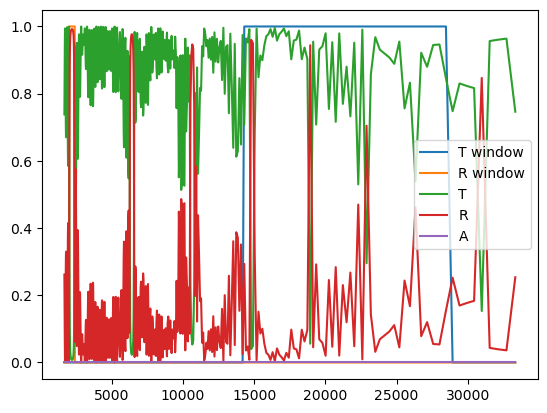

In [11]:

plt.plot(test.wavenumber_array * 1e-2, test.transmissive_envelope, label='T window')
plt.plot(test.wavenumber_array * 1e-2, test.reflective_envelope, label='R window')
plt.plot(test.wavenumber_array * 1e-2, test.transmissivity_array, label='T')
plt.plot(test.wavenumber_array * 1e-2, test.reflectivity_array, label='R')
plt.plot(test.wavenumber_array * 1e-2, test.emissivity_array, label='A')
plt.legend()

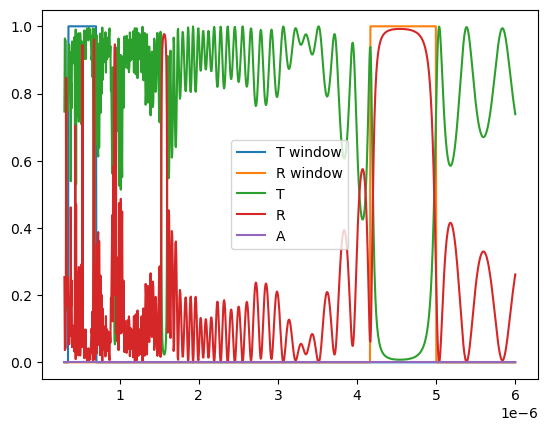

In [12]:
plt.plot(test.wavelength_array, test.transmissive_envelope, label='T window')
plt.plot(test.wavelength_array, test.reflective_envelope, label='R window')
plt.plot(test.wavelength_array, test.transmissivity_array, label='T')
plt.plot(test.wavelength_array, test.reflectivity_array, label='R')
plt.plot(test.wavelength_array, test.emissivity_array, label='A')
plt.legend()